## Movie recommender data

### TMDB 5000 Movie Dataset
### Data Source Transfer Details
    Several of the new columns contain json. You can save a bit of time by porting the load data functions [from this kernel]().

    Even in simple fields like runtime may not be consistent across versions. For example, previous dataset shows the duration for Avatar's extended cut while TMDB shows the time for the original version.

    There's now a separate file containing the full credits for both the cast and crew.

    All fields are filled out by users so don't expect them to agree on keywords, genres, ratings, or the like.

    Your existing kernels will continue to render normally until they are re-run.

    If you are curious about how this dataset was prepared, the code to access TMDb's API is posted here.

    New columns:

    homepage

    id

    original_title

    overview

    popularity

    production_companies

    production_countries

    release_date

    spoken_languages

    status

    tagline

    vote_average

    Lost columns:

    actor_1_facebook_likes

    actor_2_facebook_likes

    actor_3_facebook_likes

    aspect_ratio

    cast_total_facebook_likes

    color

    content_rating

    director_facebook_likes

    facenumber_in_poster

    movie_facebook_likes

    movie_imdb_link

    num_critic_for_reviews

    num_user_for_reviews

In [148]:
file_credits = 'tmdb_5000_credits.csv'
file_movies = 'tmdb_5000_movies.csv'

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [150]:
credits = pd.read_csv(file_credits)
credits.head(2)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [151]:
movies = pd.read_csv(file_movies)
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [152]:
df = pd.merge(left=credits, right=movies, on='title')
df.head(2)

,movie_id,title,cast,crew,budget,genres,homepage,id,keywords,original_language,...,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,...,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,...,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500


### columns in data

In [153]:
col = list(df.columns)
col

['movie_id',
 'title',
 'cast',
 'crew',
 'budget',
 'genres',
 'homepage',
 'id',
 'keywords',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'vote_average',
 'vote_count']

##### Important columns are
    ['id',
     'title',
     'cast',
     'crew',
     'genres',
     'overview',
     'keywords',
     'original_language',
     'release_date',
     'vote_average',
     'vote_count']

### Finding null values in data

In [154]:
df.isna().sum()

movie_id                   0
title                      0
cast                       0
crew                       0
budget                     0
genres                     0
homepage                3096
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
vote_average               0
vote_count                 0
dtype: int64

### finding correlation in budget and rating

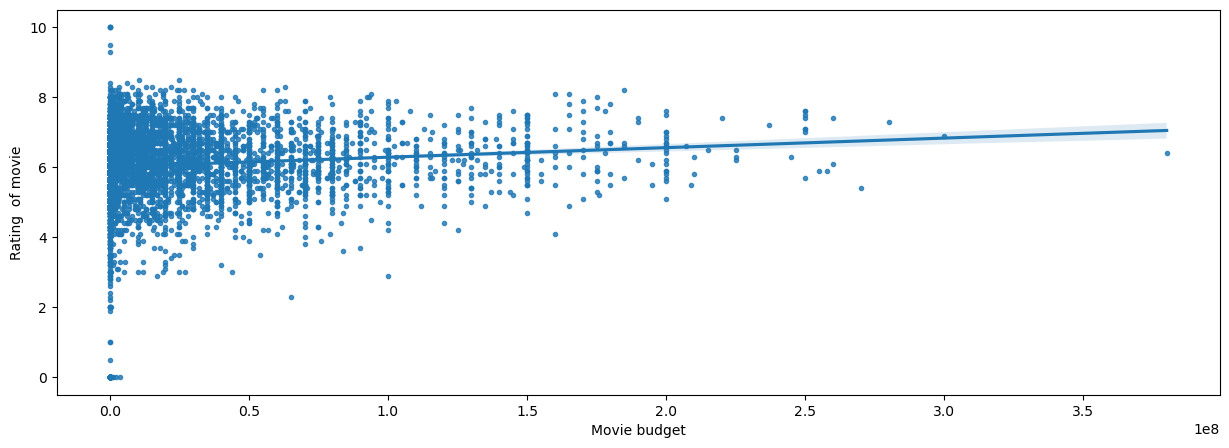

In [155]:
plt.figure(figsize=(15, 5))
sns.regplot(x=df['budget'], y=df['vote_average'], marker='.')
plt.xlabel('Movie budget')
plt.ylabel('Rating  of movie')
plt.show()

from the above plot we can clearly see that the movie budget has no effect on movie rating. if budget is high it is not important that rating is good. so i can drop the budget column as it is not that important for our model

### finding correlation in budget and rating

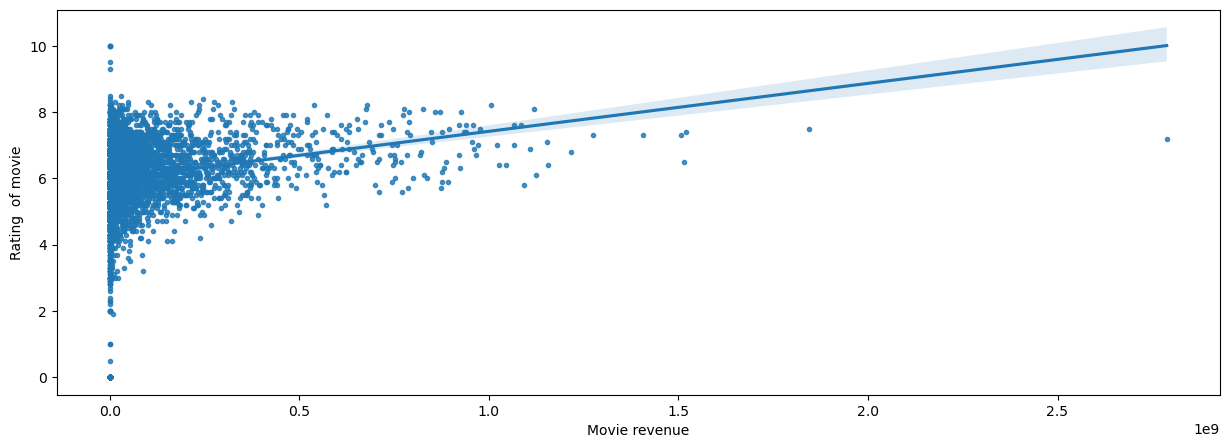

In [156]:
plt.figure(figsize=(15, 5))
sns.regplot(x=df['revenue'], y=df['vote_average'], marker='.')
plt.xlabel('Movie revenue')
plt.ylabel('Rating  of movie')
plt.show()

from the above plot we can clearly see that the movie revenue has no effect on movie rating. if revenue is high it is not important that rating is good. so i can drop the revenue column as it is not that important for our model

In [157]:
data = df[['id','title','cast','crew','genres','overview','keywords','original_language','release_date','vote_average','vote_count']]
data = data.copy()
data.head(2)

,id,title,cast,crew,genres,overview,keywords,original_language,release_date,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","In the 22nd century, a paraplegic Marine is di...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,2009-12-10,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","Captain Barbossa, long believed to be dead, ha...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,2007-05-19,6.9,4500


In [158]:
data.shape

(4809, 11)

In [159]:
#missing value in data
data.isna().sum()

id                   0
title                0
cast                 0
crew                 0
genres               0
overview             3
keywords             0
original_language    0
release_date         1
vote_average         0
vote_count           0
dtype: int64

In [160]:
data.dropna(inplace=True)

In [161]:
data.duplicated().sum()

0

### Preprocessing the cast, crew, geners, keywords, overview column

In [162]:
#extract names of genres and keywords
def convert_feature(obj):
    eval_list = []
    for i in eval(obj):
        eval_list.append(i['name'])
    string = ','.join(map(str, eval_list))
    return string.replace(' ', '').casefold()

In [163]:
#tsaking top 3 actor names from cast
actors_list = []
for i in range(len(data)):
    try:
        lis = []
        count = 1
        for j in eval(data.iloc[i, 2]):
            lis.append(j['name'])
            count += 1
            if count == 4:
                break
        actors_list.append(lis)
    except:
        actors_list.append([''])
        

def cast_format(obj):
    eval_list = []
    for i in range(len(eval(obj))):
        eval_list.append(eval(obj)[i]['name'])
        if i == 2:
            break
    string = ','.join(map(str, eval_list))
    return string.replace(' ', '').casefold()

In [164]:
#extracting the director names from crew
director_list = []

for i in range(len(data)):
    lis = []
    for j in eval(data.iloc[i, 3]):
        if j['job']=='Director':
            lis.append(j['name'])
    director_list.append(lis)
            
def crew_dirctor(obj):
    for i in eval(obj):
        if i['job'] == 'Director':
            return str(i['name']).replace(' ', '').casefold()
        elif i['job'] == 'Producer':
            return str(i['name']).replace(' ', '').casefold()

In [165]:
data['genres'] = data['genres'].apply(convert_feature)
data['keywords'] = data['keywords'].apply(convert_feature)
data['cast'] = data['cast'].apply(cast_format)
data['crew'] = data['crew'].apply(crew_dirctor)

In [166]:
#replacing none with none list
for i in range(len(data)):
    if data.iloc[i, 3] == None:
        data.iloc[i, 3] = ''
        
#replacing overview with list of overview
for i in range(len(data)):
    try:
        data.iloc[i, 5] = data.iloc[i, 5].casefold()
    except:
        data.iloc[i, 5] = ''

#formatting lower case in title
for i in range(len(data)):
    try:
        data.iloc[i, 1] = data.iloc[i, 1].casefold()
    except:
        data.iloc[i, 1] = ''

#showing null values
data.isna().sum()

id                   0
title                0
cast                 0
crew                 0
genres               0
overview             0
keywords             0
original_language    0
release_date         0
vote_average         0
vote_count           0
dtype: int64

### creating tags column

In [167]:
data['release_year'] = 0
for i in range(len(data)):
    data.iloc[i, 11] = str(data.iloc[i, 8]).split('-')[0]

data['rating'] = 0
for i in range(len(data)):
    data.iloc[i, 12] = str(data.iloc[i, 9]).split('.')[0]
#making tags column
data['tags'] = (
    data['title'] +','+ data['cast'] +','+ 
    data['crew'] +','+ data['genres'] +','+ 
    data['keywords'] +','+ data['original_language'] +','+
    data['release_year'] +','+ data['rating']
)
data.drop(columns=['release_year', 'rating', 'keywords'], axis=1, inplace=True)
data['tags'][1]

"pirates of the caribbean: at world's end,johnnydepp,orlandobloom,keiraknightley,goreverbinski,adventure,fantasy,action,ocean,drugabuse,exoticisland,eastindiatradingcompany,loveofone'slife,traitor,shipwreck,strongwoman,ship,alliance,calypso,afterlife,fighter,pirate,swashbuckler,aftercreditsstinger,en,2007,6"

In [168]:
data.columns=(
    'TMDB id', 'Title', 'Actors', 'Director',
    'Type', 'Overview', 'Language', 'Release', 'Rating', 'Vote count', 'tags'
)
data.iloc[:, 2] = [','.join(i) for i in actors_list]
data.iloc[:, 3] = [','.join(i) for i in director_list]
data.head(2)

,TMDB id,Title,Actors,Director,Type,Overview,Language,Release,Rating,Vote count,tags
0,19995,avatar,"Sam Worthington,Zoe Saldana,Sigourney Weaver",James Cameron,"action,adventure,fantasy,sciencefiction","in the 22nd century, a paraplegic marine is di...",en,2009-12-10,7.2,11800,"avatar,samworthington,zoesaldana,sigourneyweav..."
1,285,pirates of the caribbean: at world's end,"Johnny Depp,Orlando Bloom,Keira Knightley",Gore Verbinski,"adventure,fantasy,action","captain barbossa, long believed to be dead, ha...",en,2007-05-19,6.9,4500,"pirates of the caribbean: at world's end,johnn..."


In [169]:
data.to_csv(r'data.csv', index=False)
data.shape

(4805, 11)

### Stemming the tags (eg. ['loved', 'loving', 'loves'] stemmed in ['love', 'love', 'love'])

In [170]:
#Natural language processing toolkit
import nltk

In [171]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [172]:
def stemmer(obj):
    lis = []
    for i in obj.split(','):
        lis.append(ps.stem(i))
    return ' '.join(lis)

In [173]:
data['tags'].apply(stemmer)

0       avatar samworthington zoesaldana sigourneyweav...
1       pirates of the caribbean: at world's end johnn...
2       spectr danielcraig christophwaltz léaseydoux s...
3       the dark knight ris christianbal michaelcain g...
4       john cart taylorkitsch lynncollin samanthamort...
                              ...                        
4804    el mariachi carlosgallardo jaimedehoyo peterma...
4805    newlyw edwardburn kerrybishé marshadietlein ed...
4806    sign  seal  deliv ericmabiu kristinbooth cryst...
4807    shanghai cal danielhenney elizacoup billpaxton...
4808    my date with drew drewbarrymor brianherzling c...
Name: tags, Length: 4805, dtype: object

### feature count from every tags column

In [174]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, stop_words='english')

In [175]:
arr = cv.fit_transform(data['tags']).toarray()
arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Finding cosign distance between movies

In [176]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(arr)

In [184]:
import dill
with open(r'similarities.pkl', 'wb') as file_obj:
    dill.dump(similarity, file_obj)

In [188]:
df = pd.read_csv('data.csv')

### find similar movies

In [189]:
def recomender(movie, data):
    try:
        #find index of movie in data
        movie_index = data[data['Title'] == movie.casefold()].index[0]
        print(movie_index)
        distances = similarity[movie_index]
        recommended_movies = sorted(list(enumerate(distances)), 
                                    reverse=True, 
                                    key=lambda x: x[1])[1:6]
        for i, j in recommended_movies:
            print(i, j, data.iloc[i, 1])
    except Exception as e:
        print(e)

In [190]:
df[df['Title']=='iron man'].index[0]

68

In [191]:
recomender('iron man', data)

68
79 0.7029594915666377 iron man 2
31 0.7008766440504623 iron man 3
182 0.5564148840746571 ant-man
16 0.5263157894736841 the avengers
7 0.4736842105263157 avengers: age of ultron


In [181]:
data.columns[0]

'TMDB id'